In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import cv2 


In [3]:
%matplotlib inline 

In [4]:
plt.style.use('dark_background') #use for dark background

In [5]:
path = r'C:\Users\Ron\Desktop\Physics stuff\AY 2022-2023\AP157\low contrast pics' 
gray = '\yutaka takanashi towards the city.jpg' 

#Load image in grayscale mode
img = mpimg.imread(path + gray, 0)

0.0 255.0


<Figure size 720x720 with 0 Axes>

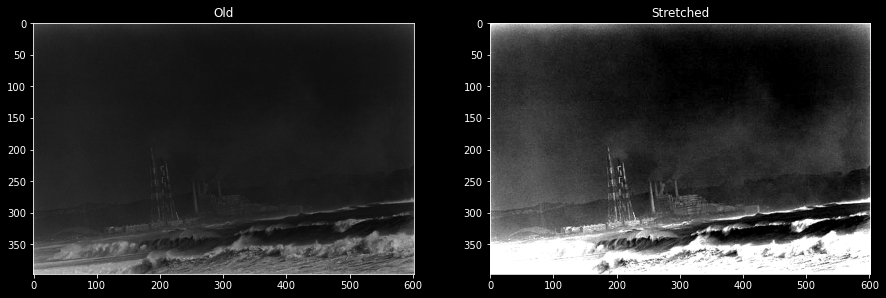

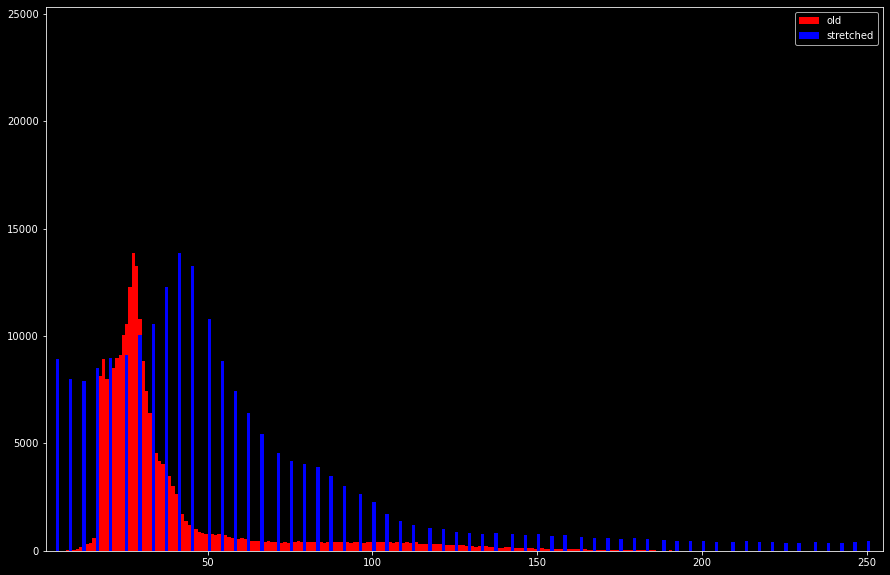

In [6]:
I_min = np.percentile(img, 5) #5th percentile of the intensity of the grayscale img 
I_max = np.percentile(img, 90) #90th percentile of the intensity 
new_img = (img - I_min)*255/(I_max - I_min) #contrast stretch image 
new_img[new_img<0] = 0 #clip those pixels below I_min
new_img[new_img>255] = 255 #clip those pixels below I_max

print(np.min(new_img), np.max(new_img))

hori = np.concatenate((img, new_img), axis=1)
fig = plt.figure(figsize=(10,10))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(img, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Old')
ax2.imshow(new_img, cmap='gray', vmin=0, vmax=255)
ax2.set_title('Stretched')

plt.figure(figsize=(15,10))
hist = np.histogram(img.flatten(), bins=256)[0] 
plt.hist(img.flatten(), 256,[0,256], color = 'r')
plt.hist(new_img.flatten(), 256, [0,256], color='b')
plt.xlim([1,255])
plt.legend(('old', 'stretched'), loc='best')


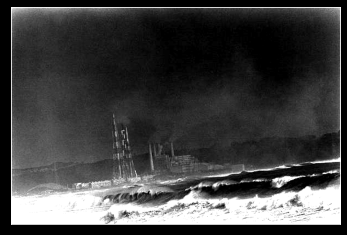

In [10]:
plt.figure()
plt.imshow(new_img, cmap='gray') 
plt.xticks([])
plt.yticks([])
plt.savefig('yutaka contrast stretched.png', dpi=300)

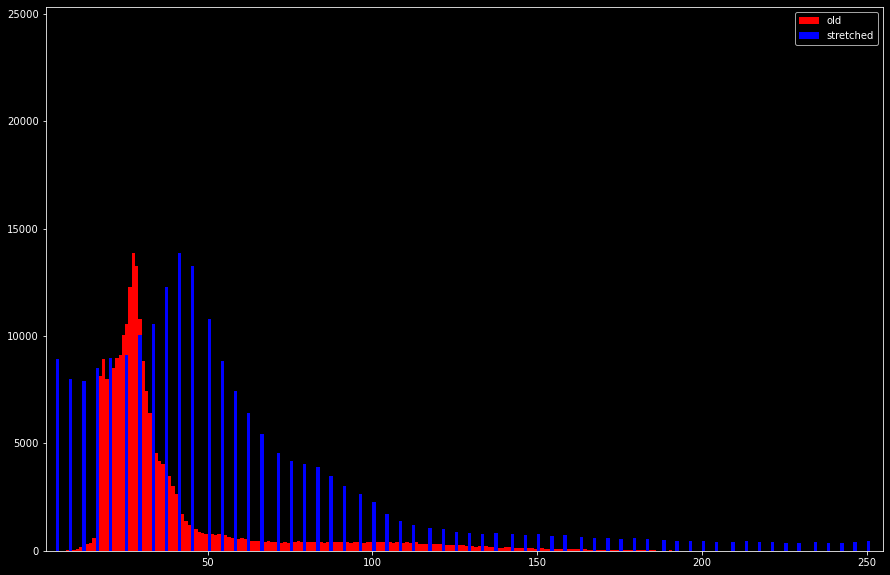

In [11]:
plt.figure(figsize=(15,10))
hist = np.histogram(img.flatten(), bins=256)[0] 
plt.hist(img.flatten(), 256,[0,256], color = 'r')
plt.hist(new_img.flatten(), 256, [0,256], color='b')
plt.xlim([1,255])
plt.legend(('old', 'stretched'), loc='best')
plt.savefig('grayscale_histogram.png', dpi=300)